## 1. EDA

In [11]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv("titanic.csv")

# Display basic information
print(titanic.info())
print(titanic.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

C:\Users\rakes\AppData\Local\Temp\ipykernel_13220\3272341797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Survived', palette='viridis')


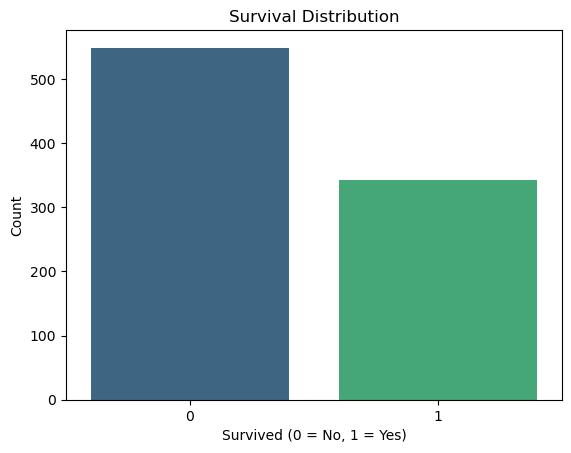

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival distribution
sns.countplot(data=titanic, x='Survived', palette='viridis')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



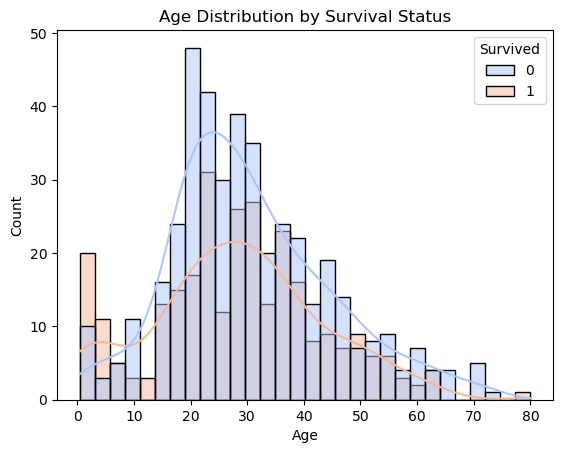

In [18]:
# Distribution of age
sns.histplot(data=titanic, x='Age', kde=True, hue='Survived', bins=30, palette='coolwarm')
plt.title('Age Distribution by Survival Status')
plt.show()



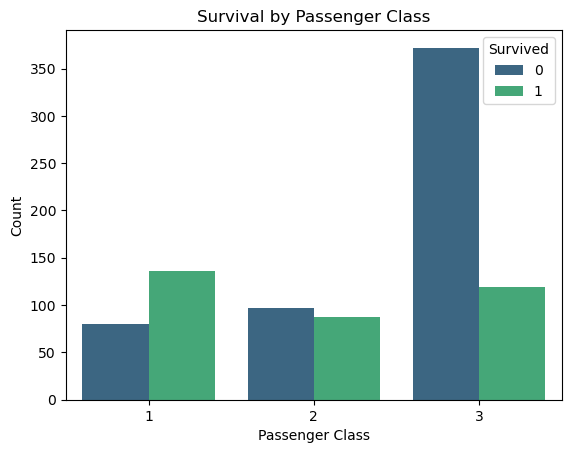

In [20]:
# Survival by Pclass
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()



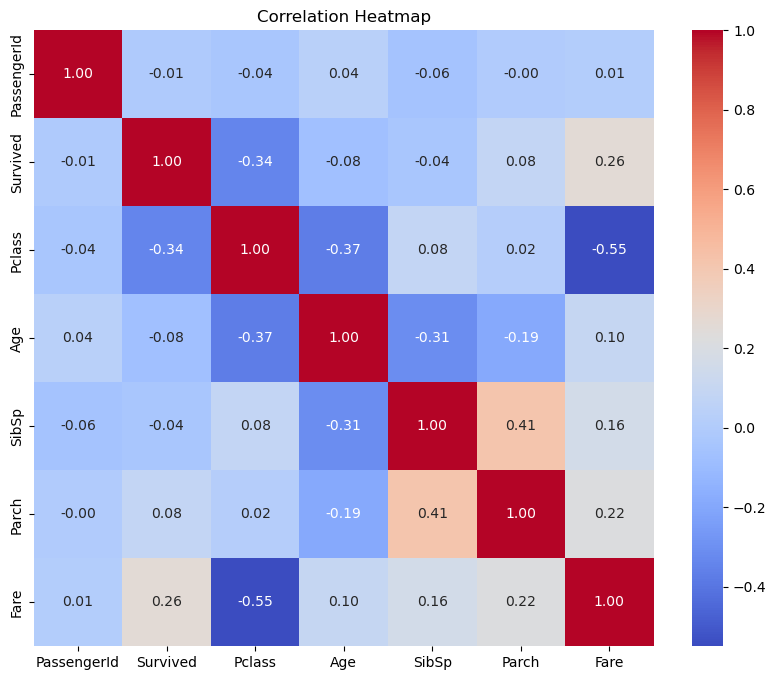

In [24]:
# Select numeric columns for correlation
numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
# Check missing values
print(titanic.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [36]:
# Impute missing Age with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())


In [38]:
# Impute missing Embarked with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


In [44]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [46]:
# Drop Cabin column
titanic = titanic.drop(columns=['Cabin'])

### feateure engineering

In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_enc = LabelEncoder()
titanic['Sex'] = label_enc.fit_transform(titanic['Sex'])  # Male = 1, Female = 0
titanic['Embarked'] = label_enc.fit_transform(titanic['Embarked'])


In [51]:
# Feature engineering: Create FamilySize
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

In [53]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0


#### Prediction Using Logistic Regression

In [56]:
from sklearn.model_selection import train_test_split

# Select features and target
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked']]
y = titanic['Survived']


In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [62]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

### Evaluation

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [67]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[136  21]
 [ 31  80]]


In [69]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [71]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8788087450507832


### Visualize Evaluation Metrics

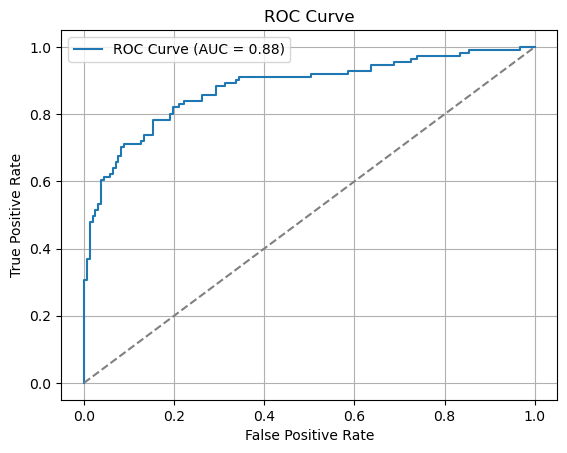

In [74]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

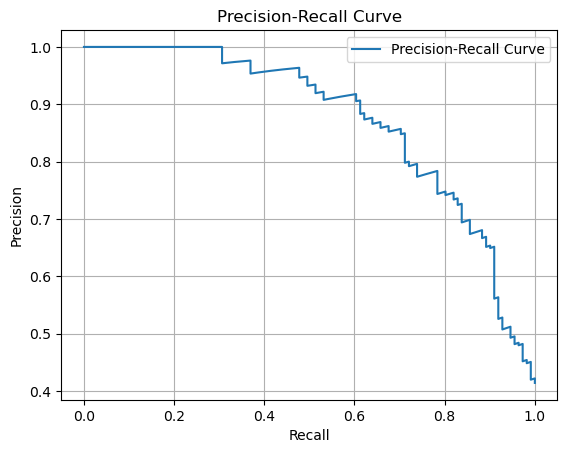

In [76]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

### Regularization impact

In [79]:
# Test different regularization strengths
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"C={c}: ROC-AUC = {roc_auc:.3f}")


C=0.01: ROC-AUC = 0.861
C=0.1: ROC-AUC = 0.878
C=1: ROC-AUC = 0.879
C=10: ROC-AUC = 0.879
C=100: ROC-AUC = 0.878


### Implement Pipeline Integration

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])


In [84]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")

Pipeline Accuracy: 0.81


### Interpretation of the results

**EDA Insights**
- Higher survival rates for females and passengers in 1st class
- Age and Fare show significant differences between survivors and non-survivors

**Logistic Regression**
- 